In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('US Mobility Retail and Recreation.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Mobility: Retail
Date,,
2020-03-01,20,13
2020-03-02,14,7
2020-03-03,22,11
2020-03-04,34,8
2020-03-05,74,8


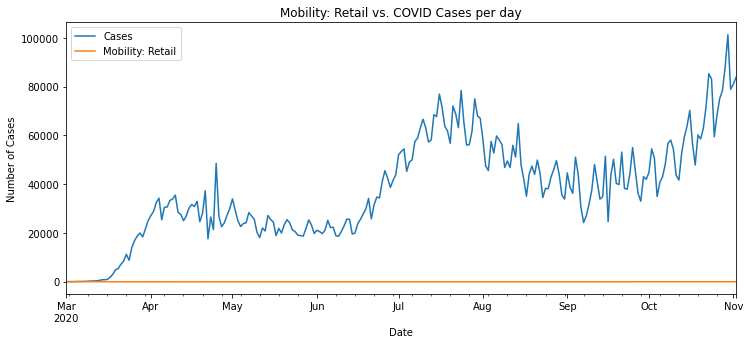

In [2]:
title = 'Mobility: Retail vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Mobility: Retail'].plot(legend=True);

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.238645
p-value                   0.656755
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [5]:
adf_test(df['Mobility: Retail'], title='Mobility')

Augmented Dickey-Fuller Test: Mobility
ADF test statistic       -2.370339
p-value                   0.150284
# lags used              14.000000
# observations          232.000000
critical value (1%)      -3.458855
critical value (5%)      -2.874080
critical value (10%)     -2.573453
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
df_transformed = df.diff()

In [7]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Mobility: Retail'], title='MobilityFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.772410
p-value                   0.062324
# lags used              12.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: MobilityFirstDiff
ADF test statistic       -3.902587
p-value                   0.002016
# lags used              13.000000
# observations          232.000000
critical value (1%)      -3.458855
critical value (5%)      -2.874080
critical value (10%)     -2.573453
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Mobility: Retail'], title='MobilitySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -6.486413e+00
p-value                 1.257669e-08
# lags used             1.100000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: MobilitySecondDiff
ADF test statistic     -7.818554e+00
p-value                 6.766357e-12
# lags used             1.600000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [10]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  21.839038749238274
BIC:  21.868217494395175

Order = 1
AIC:  21.344822882329282
BIC:  21.432621873244095

Order = 2
AIC:  21.0934529322409
BIC:  21.240225466352154

Order = 3
AIC:  20.868644328016522
BIC:  21.0747472948166

Order = 4
AIC:  20.803564364704954
BIC:  21.069358296655547

Order = 5
AIC:  20.564998395054914
BIC:  20.890847519425925

Order = 6
AIC:  20.13637695733162
BIC:  20.52264924898388

Order = 7
AIC:  19.804851203036947
BIC:  20.25191843816965

Order = 8
AIC:  19.778551497494536
BIC:  20.286789308378832

Order = 9
AIC:  19.730632969856416
BIC:  20.30042090057721

Order = 10
AIC:  19.692764972589405
BIC:  20.324486535817854

Order = 11
AIC:  19.677483421323196
BIC:  20.371526156143215

Order = 12
AIC:  19.62833076966704
BIC:  20.385086300479493

Order = 13
AIC:  19.606082192175908
BIC:  20.425946288704967

Order = 14
AIC:  19.622128369945212
BIC:  20.505501008371965

Order = 15
AIC:  19.606155141682095
BIC:  20.553440566931094

Order = 16
AIC:  19.6142419

In [11]:
results = model.fit(13)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Nov, 2020
Time:                     23:54:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.4259
Nobs:                     225.000    HQIC:                   19.9370
Log likelihood:          -2790.21    FPE:                3.27961e+08
AIC:                      19.6061    Det(Omega_mle):     2.61449e+08
--------------------------------------------------------------------
Results for equation Cases
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      139.752311       341.373549            0.409           0.682
L1.Cases                    -1.602228         0.071328          -22.463           0.000
L1.Mobility: Retail        115.8

In [12]:
lag_order = results.k_ar
lag_order

13

In [13]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[-5.36910472e+02,  8.62252925e-01],
       [-4.62420901e+03,  2.97889373e+00],
       [ 7.49784499e+03, -1.98560478e+00],
       [-6.13423674e+03, -2.53435154e+00],
       [-1.24405585e+04,  1.25705227e+00],
       [ 1.93800741e+03, -1.24678926e+00],
       [ 6.72974015e+03,  1.86475664e+00]])

In [14]:
test

,Cases,Mobility: Retail
Date,,
2020-10-27,-2149.0,3.0
2020-10-28,-3528.0,-1.0
2020-10-29,6517.0,-2.0
2020-10-30,3384.0,4.0
2020-10-31,-35482.0,-5.0
2020-11-01,24406.0,0.0
2020-11-02,815.0,3.0


In [17]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Mobility2d'])
df_forecast

,Cases2d,Mobility2d
2020-10-27,-536.910472,0.862253
2020-10-28,-4624.209014,2.978894
2020-10-29,7497.844986,-1.985605
2020-10-30,-6134.236736,-2.534352
2020-10-31,-12440.558546,1.257052
2020-11-01,1938.007408,-1.246789
2020-11-02,6729.740153,1.864757


In [22]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [23]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Mobility1d'] = (df['Mobility: Retail'].iloc[-nobs-1]-df['Mobility: Retail'].iloc[-nobs-2]) + df_forecast['Mobility2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MobilityForecast'] = df['Mobility: Retail'].iloc[-nobs-1] + df_forecast['Mobility1d'].cumsum()

In [24]:
df_forecast

,Cases2d,Mobility2d,Mobility1d,MobilityForecast,Cases1d,CasesForecast
2020-10-27,-536.910472,0.862253,-0.137747,-19.137747,8382.089528,76741.089528
2020-10-28,-4624.209014,2.978894,2.841147,-16.296600,3757.880514,80498.970042
2020-10-29,7497.844986,-1.985605,0.855542,-15.441059,11255.725500,91754.695542
2020-10-30,-6134.236736,-2.534352,-1.678810,-17.119868,5121.488764,96876.184305
2020-10-31,-12440.558546,1.257052,-0.421757,-17.541626,-7319.069782,89557.114523
2020-11-01,1938.007408,-1.246789,-1.668547,-19.210172,-5381.062375,84176.052148
2020-11-02,6729.740153,1.864757,0.196210,-19.013962,1348.677778,85524.729926


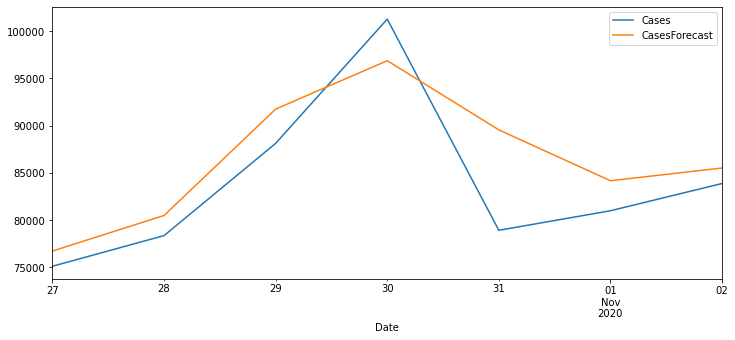

In [25]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);